<a href="https://colab.research.google.com/github/dlachaud/Data201/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**By:**

Nathaniel Jackson

Nia Pillow

Natalie Smirnoff

Daniel Lachaud

Loann Daeninckx

The California Housing dataset we have chosen to use for our 2nd group project is featured in the book "Hands-on Machine Learning with Scikit-Learn and TensorFlow" written by Aurélien Géron. We were able to retrieve and download this dataset from Kaggle.com where it is described "as an excellent introduction to implementing machine learning algorithms because it requires [basic] data cleaning while containing a list of understandable variables". 
 
 
The California Housing Dataset has a usability rating that sits at 8.52 and contains aggregated housing data regarding each district from the 1990 California census. The dataset contains 10 variables in total ( 1 categorical, and 9 quantitative)… 



A quick glance at the variables contained in the California Housing Dataset. 

1. **longitude:** A measure of how far west a house is; a higher value is farther west

2. **latitude:** A measure of how far north a house is; a higher value is farther north

3. **housingMedianAge:** Median age of a house within a block; a lower number is a newer building

4. **totalRooms:** Total number of rooms within a block

5. **totalBedrooms:** Total number of bedrooms within a block

6. **population:** Total number of people residing within a block

7. **households:** Total number of households, a group of people residing within a home unit, for a block

8. **medianIncome:** Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. **medianHouseValue:** Median house value for households within a block (measured in US Dollars)

10. **oceanProximity:** Location of the house w.r.t ocean/sea


**Source:** https://www.kaggle.com/datasets/camnugent/california-housing-prices



Questions of Interest: Questions we asked while looking at the dataset. Not all of these were explored, but all were used to generate ideas on how the dataset could be used.
1. Relationship between Latitude, Longitude, and Value?
2. Relationship between Ocean Proximity and Value?
3. Relationship between Population and Households?
4. Relationship between total Rooms/Bedrooms and Value?

Any questions looking at relationships between the house prices will help glean insight into the housing market, patterns and flows tha command it, and of course, what it means for the people and city. 

Other questions that could be explored with more temporal data are: How has value of houses changed over time? Have household values next to the Ocean changed? Given that this dataset is from CA, have housing prices with Latitude/Longitude corresponding to historic wildfire activity changed over the last 30 years? 


In [ ]:
# Load necessary Python libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import math
import seaborn as sns
#import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

**Read in dataset**

In [ ]:
df = pd.read_csv('housing.csv')  # index_col = 0)
# First 5 rows
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# Last five rows of dataset
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
#Remove null values
#df1.dropna()

#Backfill Null values
df = df.fillna(method ='bfill')



In [ ]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
#display a table of statistics
removcol= ['longitude','latitude']
df.drop(columns=removcol).describe()

#df['housing_median_age',	'total_rooms',	'total_bedrooms', 'population', 'households', 'median_income','median_house_value'].describe(include ='all')

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.793120,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,420.997084,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.shape

(20640, 10)

In [ ]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
round(df.groupby('ocean_proximity').aggregate('median_house_value').mean(), 2)

ocean_proximity
<1H OCEAN     240084.29
INLAND        124805.39
ISLAND        380440.00
NEAR BAY      259212.31
NEAR OCEAN    249433.98
Name: median_house_value, dtype: float64

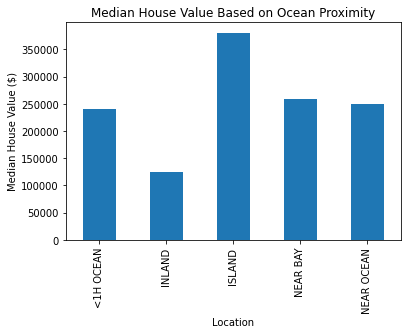

In [ ]:
round(df.groupby('ocean_proximity').aggregate('median_house_value').mean(), 2).plot(kind="bar")
plt.title("Median House Value Based on Ocean Proximity")
plt.xlabel("Location")
plt.xticks(rotation=90   )
plt.ylabel("Median House Value ($)")
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

*This graph illustrates how house values change in relation to how close the house is to the ocean. Not surprisingly, Island homes are the most expensive while Inland homes are the least expensive. What is a little more interesting is that there doesn't seem to be much of a difference between "Near Ocean/Bay" and "Less than 1 hour from Ocean". What we can gather from this, house prices are based on the values that people place on space and time. People don't seem to consider it too much of an inconvenicence to drive close to an hour to the ocean, so the house values are the same regardless of how far it is, within reason.*

The dataset has 8 features - However, not all of them might be useful for our model. Let's investigate

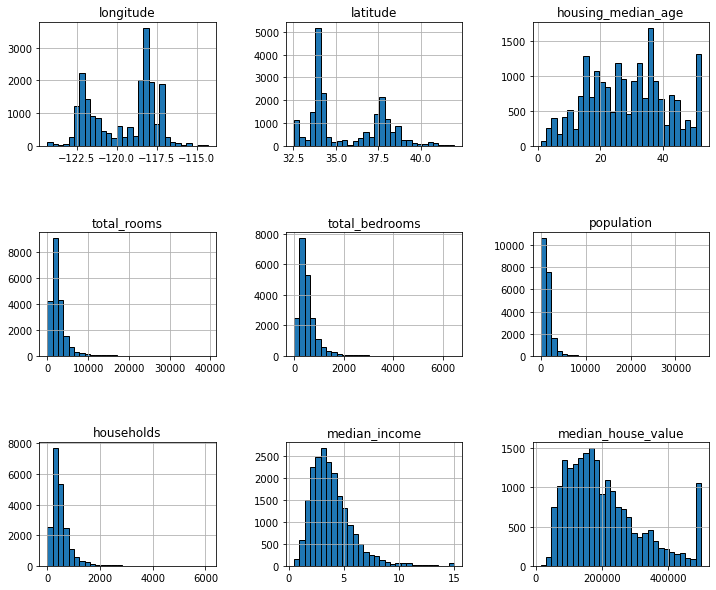

In [ ]:
# First let's plot the histogram for all variables
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Features like total_rooms, total_bedrooms, population and households suggest their could be some outliers in the data. The range of data is wide and their are some noticeable high bins.   In addition, the median_income has a long tail suggesting suggesting there are also some outliers. Some people are making more money than average. 
We need to find out if the coordinates have any impact on our target distribution.  Let's plot it out.

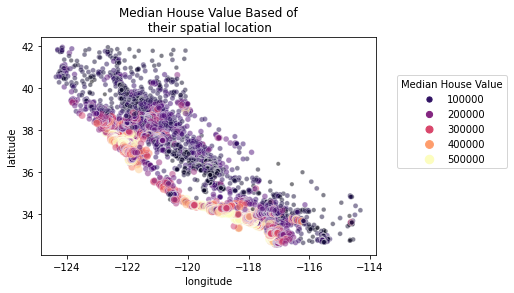

In [ ]:
sns.scatterplot(data=df, x="longitude", y="latitude",
                size="median_house_value", hue="median_house_value",
                palette="magma", alpha=0.5)
plt.legend(title="Median House Value", bbox_to_anchor=(1.05, 0.85),
           loc="upper left")
_ = plt.title("Median House Value Based of\n their spatial location")

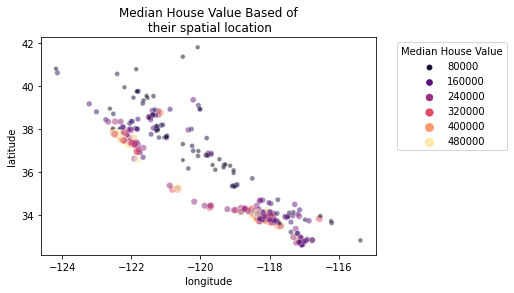

In [ ]:
# This map is a little crowded.  Let's plot a random sample of the dataset.
# But first since the data is already sorted, let's shuffle it
df = df.sample(frac=1).reset_index(drop=True)
sample = df.sample(frac = .02, replace = False) 

sns.scatterplot(data=sample, x="longitude", y="latitude",
                size="median_house_value", hue="median_house_value",
                palette="magma", alpha=0.5)
plt.legend(title="Median House Value", bbox_to_anchor=(1.05, 1),
           loc="upper left")
_ = plt.title("Median House Value Based of\n their spatial location")

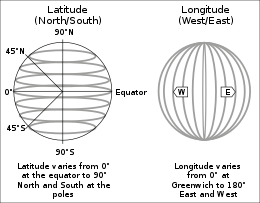

source: https://en.wikipedia.org/wiki/Geographic_coordinate_system

*A quick primer on longitude vs. latitude. so the smaller the latitude, the farther South, the smaller the longitude, the farther West. It seems that the higher value homes are clustered in the southern areas and along the coast. The cluster at (-118,34) is LA and (-122,37) is San Fransisco.*

As expected coordinates is a hurge factor on determining a house value.  Let's pick our features.

In [ ]:
+# Selecting column we are interested in
# We will built our model on that sample
df1 = df
df1.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.36,34.00,19.0,4592.0,895.0,2769.0,838.0,3.3622,105100.0,INLAND
1,-124.15,40.78,36.0,2112.0,374.0,829.0,368.0,3.3984,90000.0,NEAR OCEAN
2,-118.49,34.24,35.0,2707.0,446.0,1224.0,445.0,5.2939,244200.0,<1H OCEAN
3,-118.35,34.08,52.0,1710.0,350.0,727.0,355.0,4.5833,333900.0,<1H OCEAN
4,-119.14,34.15,25.0,2202.0,390.0,1415.0,412.0,4.4300,207700.0,NEAR OCEAN


In [ ]:
# Arrange the data into features and target
features = ['longitude', 'latitude', 'housing_median_age',	'total_rooms',	'total_bedrooms', 'population', 'households', 'median_income']
X = df1.loc[:,features]
target = ['median_house_value']
y = df1.loc[:, target]



In the code below, train_test_split splits the data and returns a list which contains four NumPy arrays, while train_size = .75 puts 75 percent of the data into a training set and the remaining 25 percent into a testing set.

In [ ]:
#Split the data into training and testing
#X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = .75)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30)

Train Test Split: Creating and Training a Model in Scikit-Learn


In [ ]:
# Shows the number of rows and columns for each variable
X_train.shape, y_train.shape

((14448, 8), (14448, 1))

In [ ]:
X_test.shape, y_test.shape

((6192, 8), (6192, 1))

In [ ]:
# Create new data frame with y_train and X_Train value
columns = ['housing_median_age',	'total_rooms',	'total_bedrooms', 'population', 'households', 'median_income']
data =pd.DataFrame(X_train, columns= columns)
data.insert(0, "MEDHV", y_train)
data.head()

,MEDHV,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17272,172600.0,50.0,1146.0,238.0,579.0,213.0,2.9583
10230,379800.0,25.0,5775.0,1149.0,2637.0,1117.0,5.4968
5497,50000.0,19.0,1970.0,431.0,1166.0,363.0,1.8208
9796,269400.0,18.0,3561.0,560.0,1753.0,553.0,5.0292
15614,337800.0,43.0,1748.0,366.0,984.0,371.0,4.5116


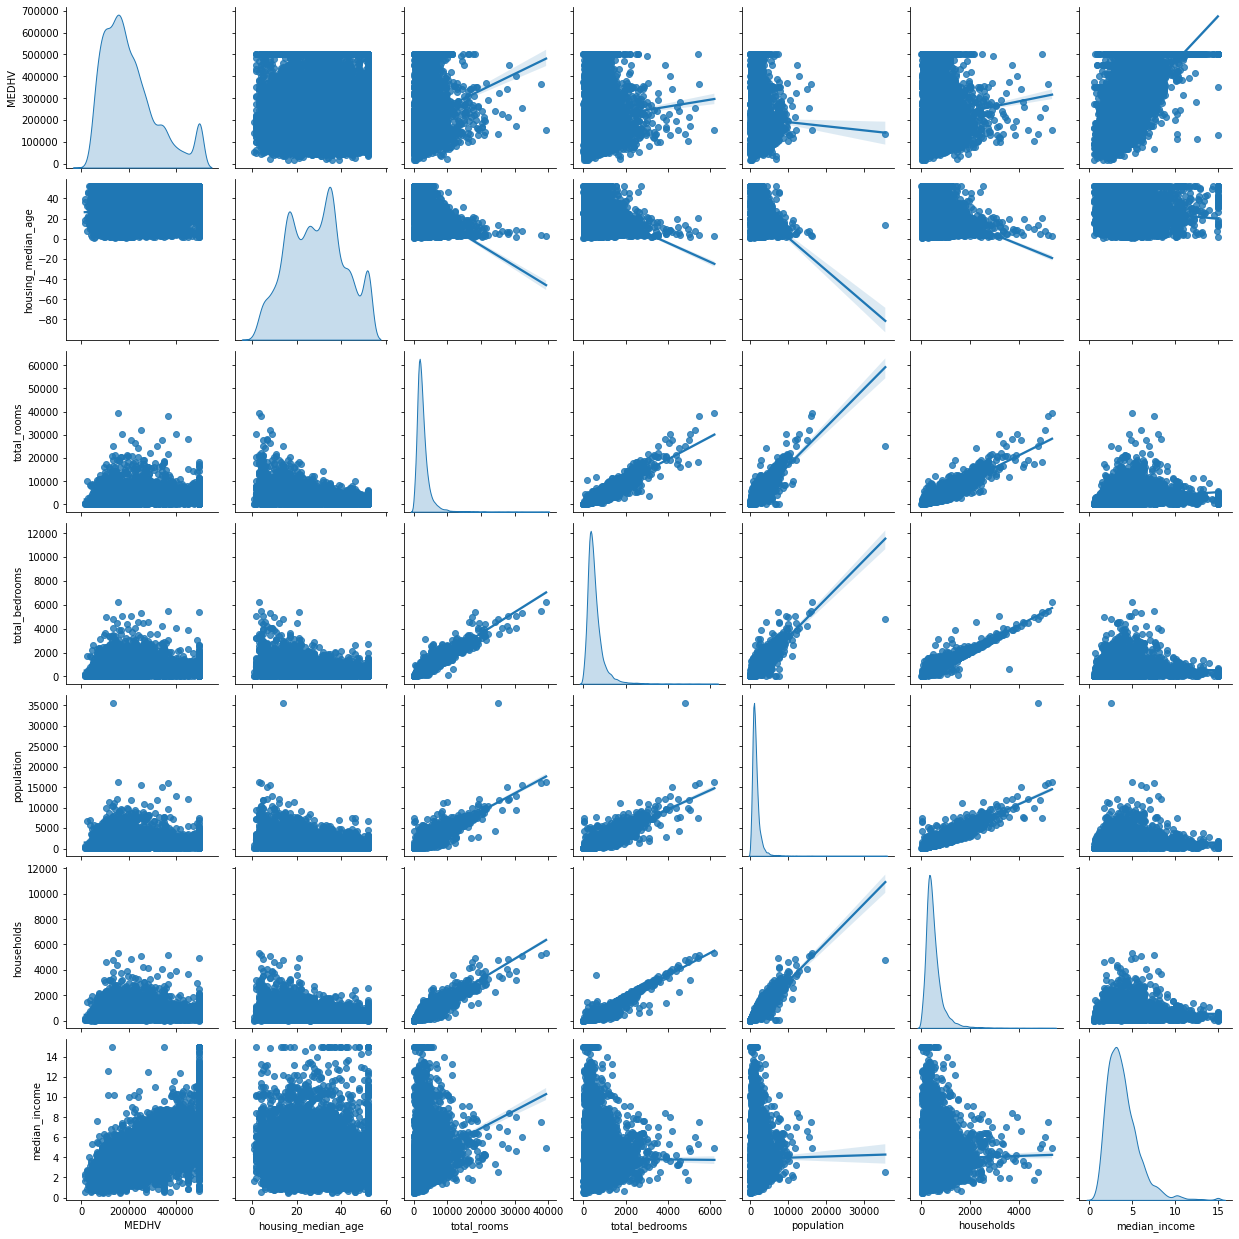

In [ ]:
_ = sns.pairplot(data, kind='reg', diag_kind='kde')

In [ ]:
# For this next plot, we're not interested in the longitude and latitude columns.  
sel_columns = ['housing_median_age',	'total_rooms',	'total_bedrooms', 'population','households', 'median_income', 'MEDHV']
data_sel = data[sel_columns]

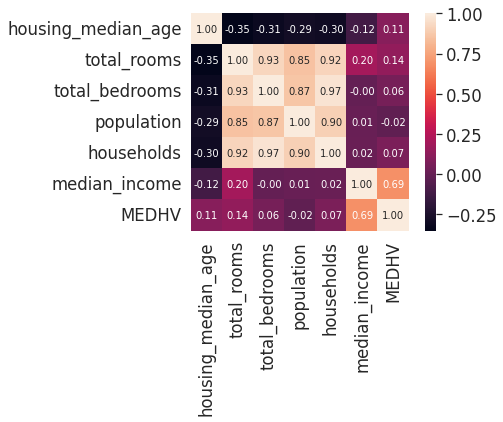

In [ ]:
import matplotlib.pyplot as plt

corr_coef = np.corrcoef(data_sel.values.T)
sns.set(font_scale=1.5)
heat_map = sns.heatmap(corr_coef,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':10},
                yticklabels=sel_columns,
                xticklabels=sel_columns)
plt.show()

*According to this chart, the strongest in regards to House Value is the Median Income. So basically, price scales with what a person is able to afford. It's interesting to note that there is a weak correlation between age of house and size of house or number of rooms. And there is virtually no relationship between income/house value and the size of the house. There is also a strong relationship between the number of households/population and the size of the house. This is interesting because one would think that more populous areas would have smaller houses (cities are more likely to have smaller houses or condos).*

Linear regression is one of the most commonly used predictive modelling techniques.  In this section, we fit the training data to a linear model 

In [ ]:
# We have already imported the model we want to use
# from sklearn.linear_model import LinearRegression
# Splitting the data into training and testing data
LinReg = LinearRegression()
# using our own data to predict
LinReg.fit(X_train, y_train)

# pass in the data to give predictions
y_predicted = LinReg.predict(X_test)

#print R square
print(LinReg.score(X_test, y_test))


0.6243659479617065


In [ ]:
print(mean_absolute_error(y_true = y_test, y_pred = LinReg.predict(X_test)))

51893.02242274491


In [ ]:
# Error on training Data
print(mean_squared_error(y_true = y_train, y_pred = LinReg.predict(X_train)))

4776879723.274029


**Meaning of the score**

The poor accuracy score of the model indicates our regressive model did not match our data well. The R-Square value suggests only that about 64% of the variation in the observations may be explained by our regression model. So for example, out of 100 tests, only 64% came out to our expectations based on the train-test system.

# Plot a histogram of the residuals and check if they have a Gaussian distribution

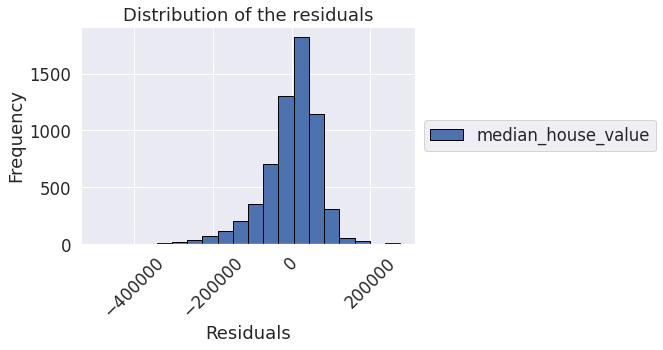

In [ ]:
#print(y_test - y_predicted)

residuals=(y_predicted - y_test)
residuals.plot.hist(bins=20, edgecolor="black")
plt.xlabel("Residuals")
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = plt.title("Distribution of the residuals")


The above graph shows the distribution of error. The data is not symmetrical - Eventhough, the values are often close to 0.
Our histogram is slightly skewed to the left.  Therefore, we cannot create reasonable expectations from our model.

# Scatterplot of predicted values and residuals to check assumption of homoscedasticity

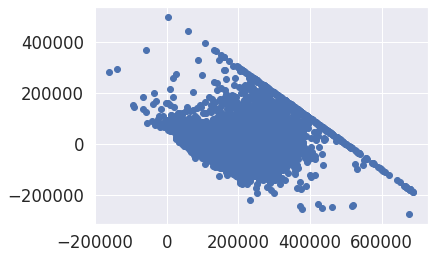

In [ ]:
plt.scatter(y_predicted, y_test - y_predicted)



(array([-750000., -500000., -250000.,       0.,  250000.,  500000.,
         750000., 1000000.]), <a list of 8 Text major ticklabel objects>)

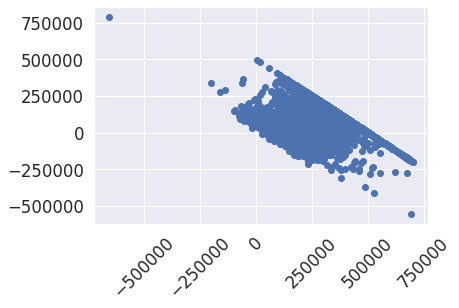

In [ ]:
plt.scatter(LinReg.predict(X), y - LinReg.predict(X))
plt.xticks(rotation=45)

(array([-750000., -500000., -250000.,       0.,  250000.,  500000.,
         750000., 1000000.]), <a list of 8 Text major ticklabel objects>)

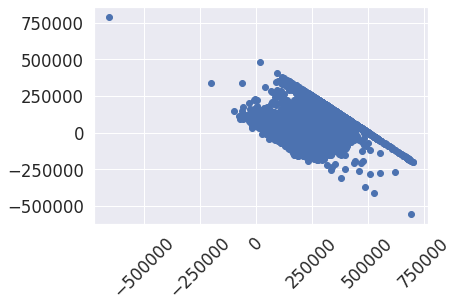

In [ ]:
plt.scatter(LinReg.predict(X_train), y_train - LinReg.predict(X_train))
plt.xticks(rotation=45)

The scatter of the plots further demosntrates that our model is not as accurate as we would like. Although the plots have the very general shape of what we would like to see, there is too much spread along the y-axis to suggest homoscedasticity. This means that for each feature/value of x, the target/value of y does NOT change at similar rates. For example, and increase of 1 in x, may lead to an increase in 1 of y. And then an increase from 1 to 2 in x, may lead to an increase in 3 for y. They do not change along similar variances. So we cannot say that, for example, a one room increase will absolutely lead to a 10k increase in value.

# Interpret the coefficients of the linear regression

In [ ]:
print(LinReg.coef_)


[[-4.17856503e+04 -4.16896884e+04  1.19401057e+03 -7.12074321e+00
   7.64305367e+01 -3.91619853e+01  8.77141568e+01  4.00706637e+04]]


When all other variables are held constant, for every one-unit increase in a feature, the target variable (Median_House-Value) increases by the corresponding coefficient.
For example, when total_room increases by one unit, the median house value of homes in that neighborhood decreases by “-7.12074321e+00”.

The coefficients represent the slope of the lines of best fit for each variable. A negative coefficient represents a downward correlation/line of best fit, and a positive coefficient represents an upward line. For a visual representation, scroll up to the tile plots.

# Conclusion

Looking at the data, it's hard to say with strong certainty how the variables affect eachother. Logically we can say that a larger house or one closer to the ocean will be worth more. But given the low R-Square value, we cannot in good faith say our model demonstrates strong accuracy. The strongest relationship we saw was between House Value and Income. However, that doesn't tell us much in regards to the data as the correlation between income and value does not equal causation. The homeowner is able to AFFORD a house of higher value, but they are not the REASON that the home has a higher value. Even with that high correlation with the initial chart, the finals statistical analysis showed that none of the variables we used to predict House Value had a strong impact to say for sure that they were causation rather than correlation. Low homoscedasticity also suggested that even if we could say there was a degree of x causing y, we couldn't say by how much x impacted y in either direction. There are too many other variables that would impact the value of the home, most specifically, the value of surrounding homes. According to what we know of the housing market, and how people purchase property based on other property in the area, we would have to do a test on comparing house values to themselves to see if higher prices along lat-long coordinates (and possibly even according to neighborhoods or zipcodes) lead to higher house values in the area.